# Imports

In [1]:
from pprint import pprint
from IPython.display import display
from hamilton import driver

import lancedb
import pyarrow as pa
import __init__ as lancedb_vdb

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


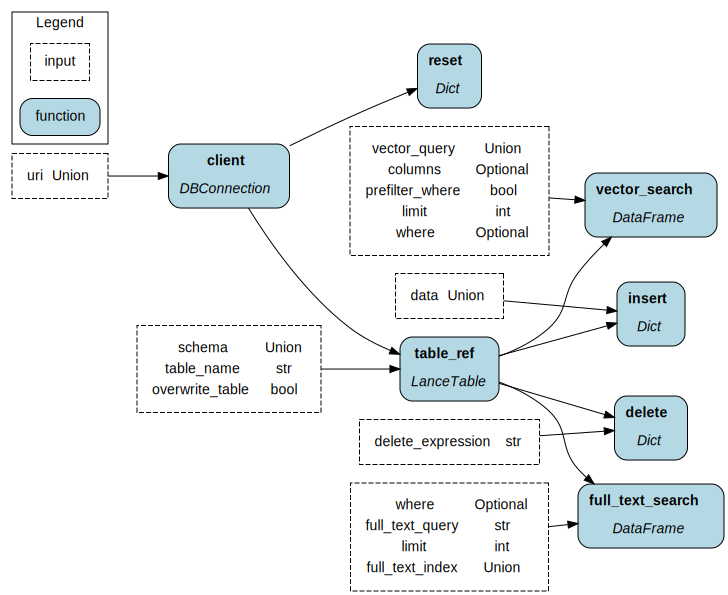

In [2]:
dr = (
    driver.Builder()
    .with_modules(lancedb_vdb)
    .build()
)

display(dr.display_all_functions(None))

In [3]:
dr.execute(final_vars=["reset"])

{'reset': {'tables_dropped': ['demo_table']}}

In [4]:
final_vars = ["insert"]

inputs = dict(
    table_name="demo_table",
    schema=pa.schema([
        ("source_id", pa.int64()),
        ("source", pa.string()),
        ("vector", lancedb.schema.vector(4)),
    ]),
    data=[
        {"source_id": 0, "source": "Google Search", "vector": [0., 2., 11., 22.]},
        {"source_id": 1, "source": "Bing Search", "vector": [11., 23., 2., 87.]}
    ],
)

res = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
)

display(
    res["insert"],
    res["insert"]["table"].to_pandas(),
)

{'table': LanceTable(demo_table), 'n_rows_added': 2}

,source_id,source,vector
0,0,Google Search,"[0.0, 2.0, 11.0, 22.0]"
1,1,Bing Search,"[11.0, 23.0, 2.0, 87.0]"


In [5]:
final_vars = ["vector_search"]

inputs = dict(
    table_name="demo_table",
    vector_query=[2., 2., 2., 2.],
)

res = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
)

display(res["vector_search"])

,source_id,source,vector,_distance
0,0,Google Search,"[0.0, 2.0, 11.0, 22.0]",485.0
1,1,Bing Search,"[11.0, 23.0, 2.0, 87.0]",7747.0


In [6]:
res = dr.execute(
    final_vars=["full_text_search"],
    inputs=dict(
        table_name="demo_table",
        full_text_index=["source"],
        full_text_query="Bing",
    ),
)

display(res["full_text_search"])

,source,score
0,Bing Search,0.693147
